## Introdução à Base de Dados de Risco de Crédito

Esta base de dados tem como objetivo principal auxiliar na análise de risco de crédito, permitindo prever a probabilidade de inadimplência de um cliente com base em variáveis pessoais, financeiras e comportamentais.

### Estrutura Geral

- **Total de registros:** 32.581  
- **Total de colunas:** 12  
- **Colunas com valores nulos:**
  - `person_emp_length`: 895 registros ausentes
  - `loan_int_rate`: 3.116 registros ausentes

### Dicionário de Dados

| Coluna                       | Tipo       | Descrição |
|-----------------------------|------------|-----------|
| `person_age`                | int64      | Idade da pessoa solicitante |
| `person_income`             | int64      | Renda anual da pessoa |
| `person_home_ownership`     | object     | Tipo de posse da residência (OWN, RENT, MORTGAGE, etc.) |
| `person_emp_length`         | float64    | Tempo de emprego (em anos) |
| `loan_intent`               | object     | Finalidade do empréstimo (MEDICAL, EDUCATION, PERSONAL, etc.) |
| `loan_grade`                | object     | Classificação de risco do empréstimo |
| `loan_amnt`                 | int64      | Valor solicitado no empréstimo |
| `loan_int_rate`             | float64    | Taxa de juros aplicada ao empréstimo |
| `loan_status`               | int64      | Indicador de inadimplência (1 = inadimplente, 0 = adimplente) |
| `loan_percent_income`       | float64    | Percentual da renda comprometida com o empréstimo |
| `cb_person_default_on_file` | object     | Registro anterior de inadimplência no cadastro de crédito (Y/N) |
| `cb_person_cred_hist_length`| int64      | Duração do histórico de crédito (em anos) |

### Considerações Iniciais

A presença de valores nulos nas colunas `person_emp_length` e `loan_int_rate` deve ser tratada antes da modelagem ou análise preditiva. O dataset é bem estruturado para tarefas de classificação binária, como prever inadimplência com base em atributos do solicitante e características do empréstimo.


## Bibliotecas

- importando bibliotecas de manipulação de Dados
- importando bibliotecas de visualisação de dados


In [124]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df_credit = pd.read_csv("/content/credit_risk_dataset.csv")

In [126]:
df_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Primeira análise dos Dados

In [127]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [128]:
# Olhando dados únicos
df_credit.nunique()


,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [129]:
# Olhando o início do DF
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [130]:
df_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Mais explorações

In [131]:
# Explorando distribuições dos dados
np.unique(df_credit['loan_status'], return_counts=True)


(array([0, 1]), array([25473,  7108]))

<ipython-input-132-b314dffa4529>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_credit['loan_status'],  palette=['blue', 'orange']);


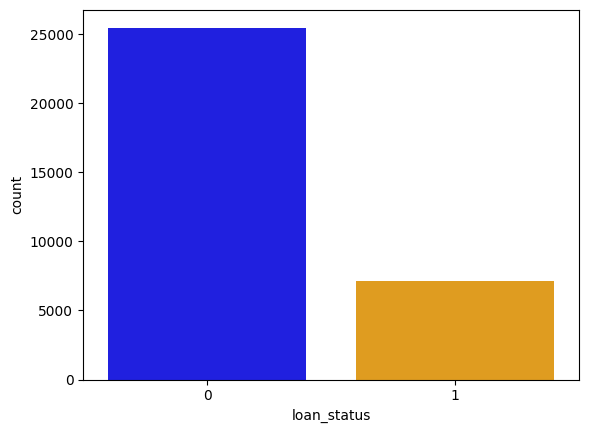

In [132]:
sns.countplot(x=df_credit['loan_status'],  palette=['blue', 'orange']);

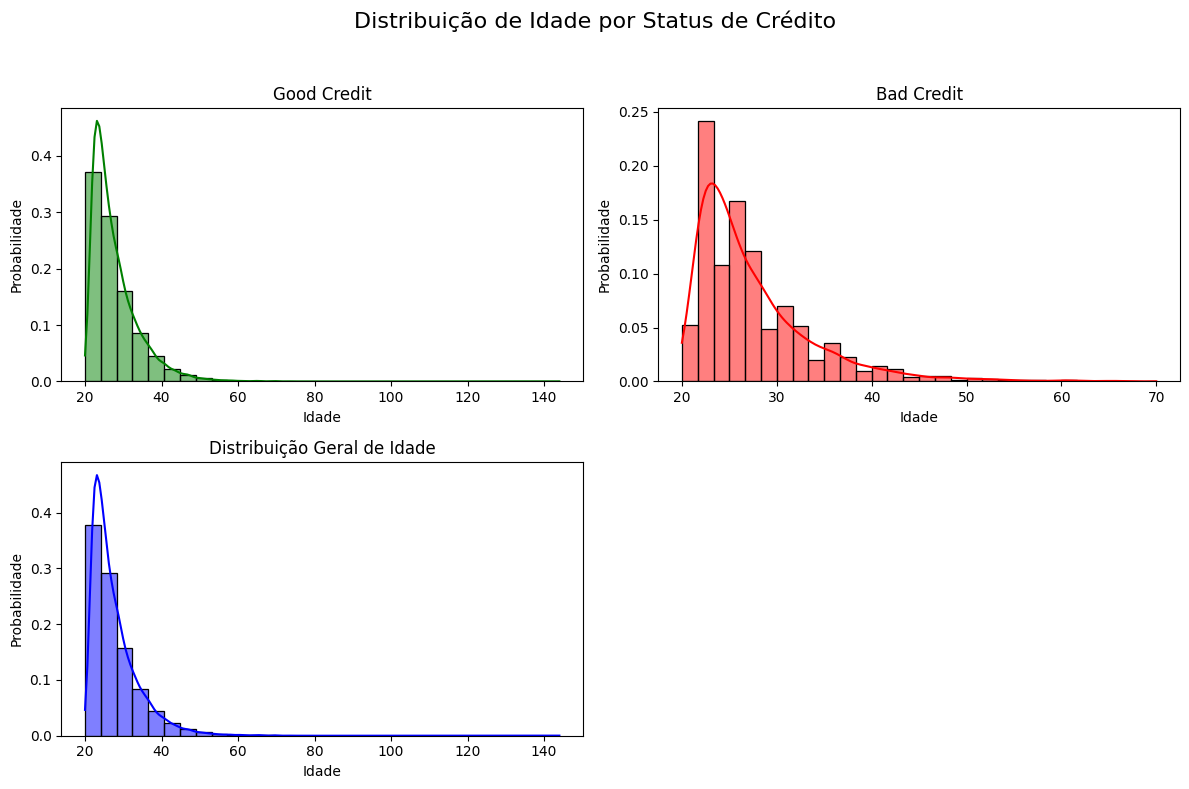

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns



df_good = df_credit[df_credit["loan_status"] == 0]["person_age"]
df_bad = df_credit[df_credit["loan_status"] == 1]["person_age"]
df_age = df_credit["person_age"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribuição de Idade por Status de Crédito', fontsize=16)

sns.histplot(df_good, bins=30, stat='probability', kde=True, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Good Credit')
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Probabilidade')

sns.histplot(df_bad, bins=30, stat='probability', kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Bad Credit')
axes[0, 1].set_xlabel('Idade')
axes[0, 1].set_ylabel('Probabilidade')

sns.histplot(df_age, bins=30, stat='probability', kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição Geral de Idade')
axes[1, 0].set_xlabel('Idade')
axes[1, 0].set_ylabel('Probabilidade')

axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


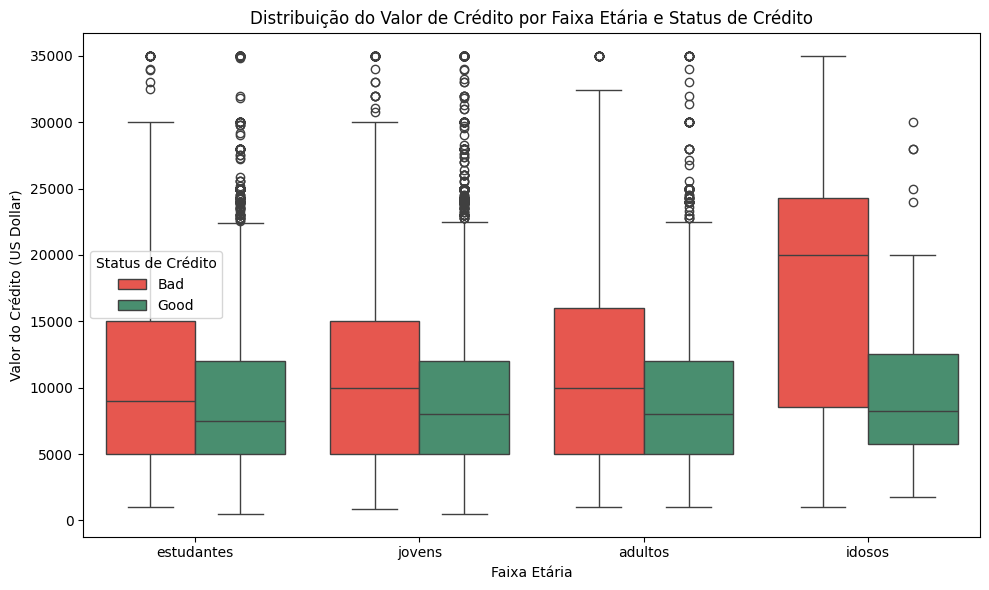

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

df_credit_exemple = df_credit.copy()
idades = (18, 25, 35, 60, 120)
faixa_idade = ['estudantes', 'jovens', 'adultos', 'idosos']
df_credit_exemple["faixa_idade"] = pd.cut(df_credit_exemple["person_age"], idades, labels=faixa_idade)


df_credit_exemple["loan_status"] = df_credit_exemple["loan_status"].map({0: 'Good', 1: 'Bad'})

valor_coluna_credito = "loan_amnt"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_credit_exemple, x="faixa_idade", y=valor_coluna_credito, hue="loan_status", palette={"Good": "#3D9970", "Bad": "#FF4136"})

plt.title("Distribuição do Valor de Crédito por Faixa Etária e Status de Crédito")
plt.xlabel("Faixa Etária")
plt.ylabel("Valor do Crédito (US Dollar)")
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


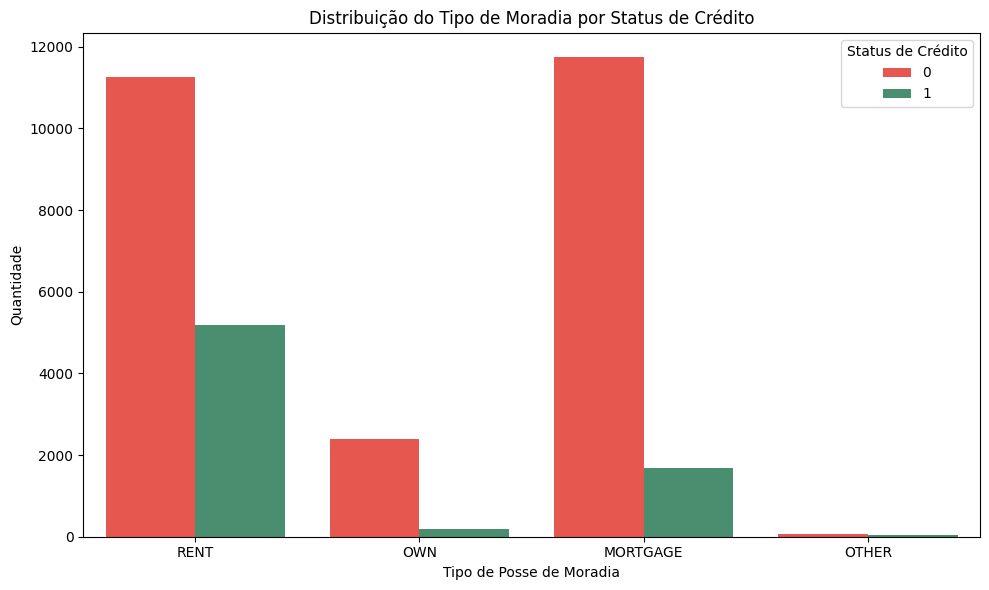

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que a coluna loan_status esteja com rótulos legíveis
df_credit["loan_status"] = df_credit["loan_status"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_credit, x="person_home_ownership", hue="loan_status", palette={"#3D9970","#FF4136"})

plt.title("Distribuição do Tipo de Moradia por Status de Crédito")
plt.xlabel("Tipo de Posse de Moradia")
plt.ylabel("Quantidade")
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


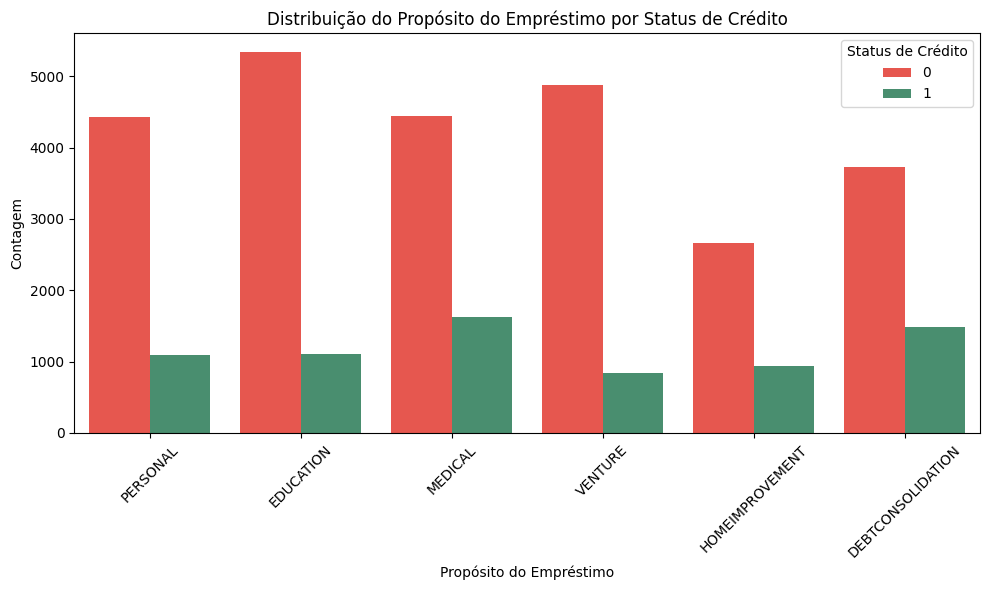

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

df_credit["loan_status"] = df_credit["loan_status"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_credit, x="loan_intent", hue="loan_status",
              palette={ "#3D9970","#FF4136"})

plt.title("Distribuição do Propósito do Empréstimo por Status de Crédito")
plt.xlabel("Propósito do Empréstimo")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


<ipython-input-137-2aefd51d2ab9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_credit.groupby(["faixa_percent_income", "loan_status"]).agg({


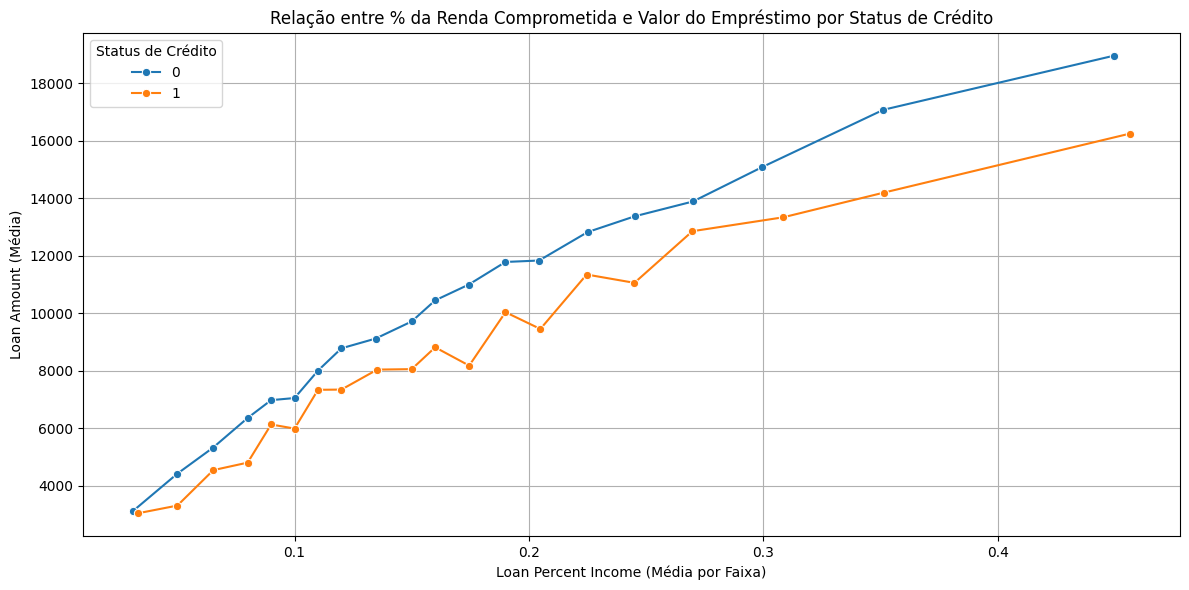

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_credit["faixa_percent_income"] = pd.qcut(df_credit["loan_percent_income"], q=20, duplicates='drop')

df_grouped = df_credit.groupby(["faixa_percent_income", "loan_status"]).agg({
    "loan_amnt": "mean",
    "loan_percent_income": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="loan_percent_income", y="loan_amnt", hue="loan_status", marker="o")

plt.title("Relação entre % da Renda Comprometida e Valor do Empréstimo por Status de Crédito")
plt.xlabel("Loan Percent Income (Média por Faixa)")
plt.ylabel("Loan Amount (Média)")
plt.legend(title="Status de Crédito")
plt.grid(True)
plt.tight_layout()
plt.show()


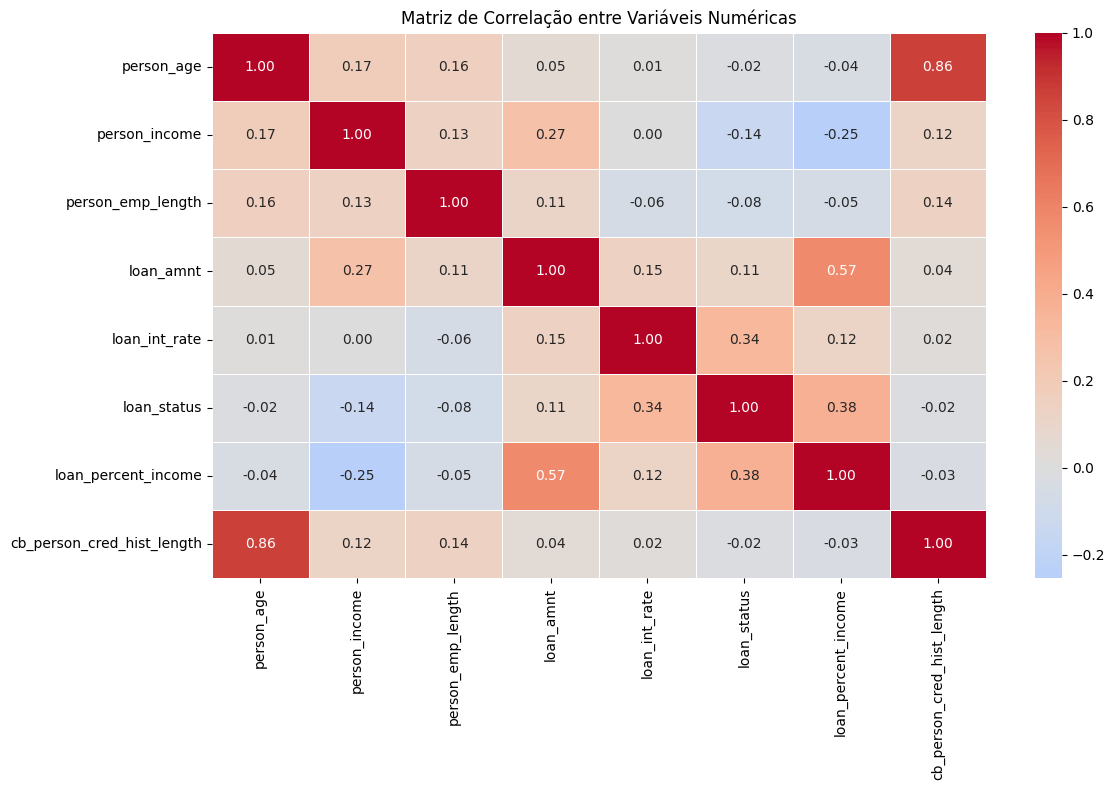

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_credit.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()


## Início ao pré-processamento de dados


### TRATAMENTO DE DADOS E INCONSISTÊNCIAS

In [139]:
#Verificando se existem idades negativas
df_credit[df_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_percent_income


In [140]:

df_credit.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_percent_income
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False,False


In [141]:

df_credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


encontramos alguns valores nullos para 'person_emp_length' e 'loan_int_rate' como temos uma quantidade considerável de dados, vamos remover os valores nulos



In [142]:
df_credit['person_age'].dropna(inplace = True)

In [143]:
df_credit.loc[pd.isnull(df_credit['person_age'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_percent_income


In [144]:
df_credit['loan_int_rate'].dropna(inplace = True)

In [145]:
df_credit.loc[pd.isnull(df_credit['person_age'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_percent_income


Aqui aplicaremos o tratamento para considerármos as colunas categóricas

In [146]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding (já aplicado para 'person_home_ownership' e 'loan_intent')
df_credit = pd.get_dummies(df_credit, columns=['person_home_ownership', 'loan_intent'], prefix=['home', 'intent'])

# Label Encoding para 'loan_grade', 'cb_person_default_on_file' e 'faixa_percent_income'
le_grade = LabelEncoder()
le_default = LabelEncoder()
le_faixa = LabelEncoder()

df_credit['loan_grade'] = le_grade.fit_transform(df_credit['loan_grade'])
df_credit['cb_person_default_on_file'] = le_default.fit_transform(df_credit['cb_person_default_on_file'])
df_credit['faixa_percent_income'] = le_faixa.fit_transform(df_credit['faixa_percent_income'])

In [147]:
df_credit.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,...,False,False,False,True,False,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,...,False,False,True,False,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,...,True,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,...,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,...,False,False,False,True,False,False,False,True,False,False


In [148]:
# Converter colunas bool geradas por get_dummies para int64
bool_cols = df_credit.select_dtypes(include='bool').columns
df_credit[bool_cols] = df_credit[bool_cols].astype('int64')

In [149]:
df_credit.dtypes

,0
person_age,int64
person_income,int64
person_emp_length,float64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64
cb_person_default_on_file,int64
cb_person_cred_hist_length,int64


In [150]:
df_credit.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,...,0,0,0,1,0,0,0,1,0,0


Aqui iremos definir as melhores colunas para usar ao treinar o modelo


In [154]:
from sklearn.feature_selection import VarianceThreshold

# Aplica o filtro de variância
selector = VarianceThreshold(threshold=0.06)  # Remove colunas com variância < 0.05
x_credit = selector.fit_transform(df_credit.drop(columns='loan_status'))

# Obtém os nomes das colunas originais (exceto 'loan_status')
colunas_originais = df_credit.drop(columns='loan_status').columns

# Obtém a máscara booleana das colunas mantidas
colunas_mantidas_mask = selector.get_support()

# Filtra os nomes das colunas que permaneceram
colunas_mantidas = colunas_originais[colunas_mantidas_mask]

# Exibe as colunas que permaneceram
print("Colunas que permaneceram após o VarianceThreshold (variância >= 0.05):")
print(list(colunas_mantidas))
print(f"Número de colunas mantidas: {len(colunas_mantidas)}")

Colunas que permaneceram após o VarianceThreshold (variância >= 0.05):
['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'faixa_percent_income', 'home_MORTGAGE', 'home_OWN', 'home_RENT', 'intent_DEBTCONSOLIDATION', 'intent_EDUCATION', 'intent_HOMEIMPROVEMENT', 'intent_MEDICAL', 'intent_PERSONAL', 'intent_VENTURE']
Número de colunas mantidas: 18


 Os previsores serão chamados de 'X', ja as classes serão chamadas de 'Y'

In [157]:
x_credit
x_credit

array([[2.20e+01, 5.90e+04, 1.23e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.10e+01, 9.60e+03, 5.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.50e+01, 9.60e+03, 1.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [6.50e+01, 7.60e+04, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.60e+01, 1.50e+05, 5.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [6.60e+01, 4.20e+04, 2.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]])

In [158]:
y_credit = df_credit.iloc[:, 8].values
y_credit

array([1, 0, 0, ..., 0, 0, 0])

Nesta etapa vamos padronizar os valores para uma melhor interpretação do modelo


In [159]:
from sklearn.preprocessing import StandardScaler

#Padronizando valores
x_credit = StandardScaler().fit_transform(x_credit)

In [160]:
x_credit

array([[-0.90337383, -0.11414329, 28.53553777, ..., -0.47854772,
         2.21388482, -0.46141412],
       [-1.06090423, -0.91114671,  0.05076896, ..., -0.47854772,
        -0.45169468, -0.46141412],
       [-0.43078263, -0.91114671, -0.91481642, ...,  2.08965576,
        -0.45169468, -0.46141412],
       ...,
       [ 5.87043346,  0.16012914, -0.43202373, ..., -0.47854772,
        -0.45169468, -0.46141412],
       [ 4.45265984,  1.35402091,  0.05076896, ..., -0.47854772,
         2.21388482, -0.46141412],
       [ 6.02796387, -0.38841572, -0.67342008, ...,  2.08965576,
        -0.45169468, -0.46141412]])

Agora iremos dividir a nossa base de treinamento e teste


In [161]:
#Dividindo base de treuinamento
from sklearn.model_selection import train_test_split

In [162]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit,y_credit, test_size = 0.25, random_state = 0)

In [163]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((24435, 18), (24435,))

In [164]:
x_credit_teste.shape, y_credit_teste.shape

((8146, 18), (8146,))

Agora vamos salvar as bases tratadas para que possamos usalas no nosso treinamento, para isso iremos usar a biblioteca pickle para salvar a base no formato pkl

In [167]:
import pickle

with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)